# San Francisco Employee Salary Analysis

## Aim of Analysis

To explore which type of employees make less or more money,or which employees get normal pay hikes and promotions

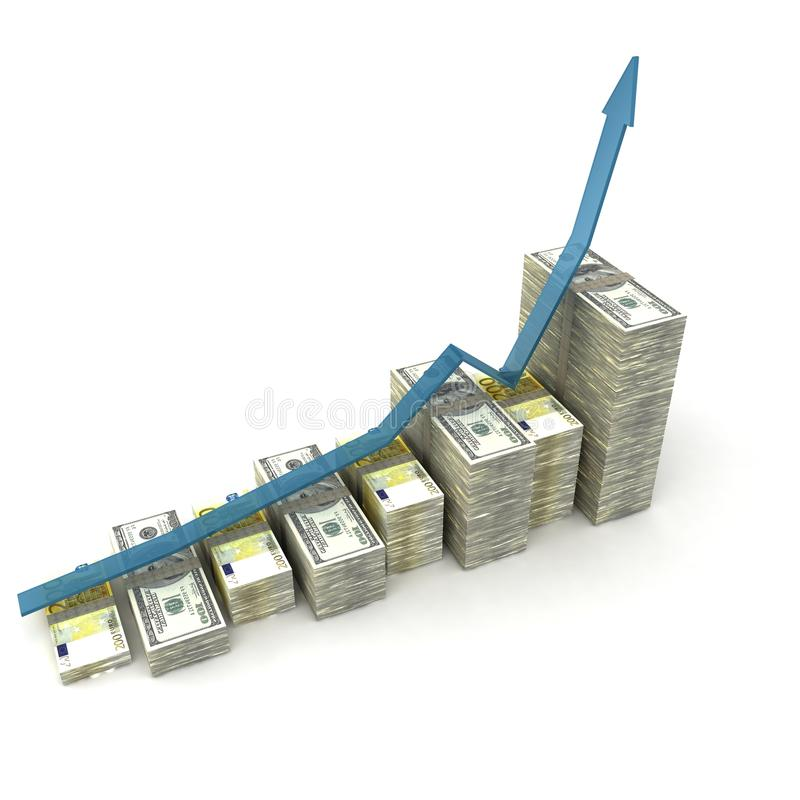

## 1.0 Importing libraries that would be needed.

In [2]:
# importing libraries for exploration and numerical analysis
import pandas as pd
import numpy as np

#importing the statistics package from scipy library
from scipy import stats

# importing libraries for visalisation
import matplotlib.pyplot as plt
import seaborn as sns



## 2.0 Loading Dataset 

In [3]:
# Loading in San Francisco Employee Salary dataset

# Reading data into a dataframe and storing it in the variable employee_salary
# Specifying the dtypes of the columns to avoid errors when loading the data
#low_memory=False is added to silence the error we had when loading the dataset previously
employee_salary = pd.read_csv("./data/Salaries.csv",low_memory= False)  

# Showing the first 5 rows of dataset
print(employee_salary.head())

# Printing the number of rows and columns of dataset
print("The dataset has the number of rows and columns respectively:")
print(employee_salary.shape)

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25      NaN  567595.43         567595.43   
1  155966.02   245131.88  137811.38      NaN  538909.28         538909.28   
2  212739.13   106088.18    16452.6      NaN  335279.91         335279.91   
3    77916.0    56120.71   198306.9      NaN  332343.61         332343.61   
4   134401.6      9737.0  182234.59      NaN  326373.19         326373.19   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  
1 

## 3.0 More insight into our data

### 3.1 Checking for datatypes of various attributes

In [4]:
# checking for the datatypes of the vaules stored in our data

employee_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


Our data is distributed amongst three main datatypes **integers ,floats and strings**.Therefore we have both **continuous and discrete data**.
Also from the above we find out that the **Notes** column has null values through out. **Therefore we can take that whole column out.**
Other columns tend to have some null values in them.

There are mishaps with the datatypes **BasePay, OvertimePay,OtherPay,Benefits and Year column**
 **BasePay, OvertimePay,OtherPay,Benefits** are supposed to be of **float** datatype and **Year column** of **date-time** datatype.

### 3.2 Checking for categorical data and Quantitative data

In [5]:
# using the describe function on our data to bring out a numerical summary statistics of our numeric data.
employee_salary.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN



Checking columns that have numerical data, we see a mishap with the **Year** column. The **Year** column is supposed to be a categorical data and not a numerical one. This problem may have come up with incorrect datatype.

From the above data we can make use of only the TotalPay and TotalPayBenefits for further analysis which should not be so since meaningful deductions can also be made from  **BasePay, OvertimePay,OtherPay and Benefits**

The mean for the TotalPay is greater than its median slightly. This is the same for TotalPayBenefits as well.
We shall plot histograms for these two quantitative variables to determine the shape of its distribution.


        


### 3.3 Checking for null values

In [6]:
# checking for missing values

# storing the sum of missing values of every column in the variable missing_values
missing_values = employee_salary.isna().sum()

# calculating the total number of missing values
total_missing_values = missing_values.sum()

print(missing_values)
print("\nSum of all missing values: "+ str(total_missing_values)) 

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

Sum of all missing values: 295953


Now that is a lot of data and should we decide to remove all null values, will result in inaccurate analysis therefore we have to impute data to fill the null values in **BasePay,Benefits and Status columns**.

## 4.0 Mishaps encountered so far

- Missing values
    - An entire column having null values.
- Incorrect Datatype for **BasePay, OvertimePay,OtherPay,Benefits and Year** column

## 4.1 Performing Data Cleaning to Rectify mishaps encountered

### 4.2 Changing the datatype of BasePay column

In [7]:
# printing out the BasePay column
print(employee_salary['BasePay'])

0            167411.18
1            155966.02
2            212739.13
3              77916.0
4             134401.6
              ...     
148649            0.00
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653            0.00
Name: BasePay, Length: 148654, dtype: object


We can see that there are certain string values amongst the column values which is not right. Therefore we have to filter the column to remove unwanted strings then replace them with 0.00

In [8]:
# for loop for converting every values in the column into the float datatype
# By replacing string values with floats
for (pay,BasePay_data) in employee_salary.iteritems():
    employee_salary["BasePay"] = employee_salary["BasePay"].replace('Not Provided',0.00).astype(float)

# printing converted data to the screen    
print(employee_salary["BasePay"])

0         167411.18
1         155966.02
2         212739.13
3          77916.00
4         134401.60
            ...    
148649         0.00
148650         0.00
148651         0.00
148652         0.00
148653         0.00
Name: BasePay, Length: 148654, dtype: float64


### 4.3 Changing the datatype of OvertimePay column

In [9]:
# printing out the OvertimePay column
print(employee_salary['OvertimePay'])

0                  0.0
1            245131.88
2            106088.18
3             56120.71
4               9737.0
              ...     
148649            0.00
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653            0.00
Name: OvertimePay, Length: 148654, dtype: object


The mistake we encountered with the BasePay column is the same with this column. Therefore we shall apply the same techniques of rectification to it.

In [10]:
# for loop for converting every values in the column into the float datatype
# By replacing string values with floats
for (pay,OvertimePay_data) in employee_salary.iteritems():
    employee_salary["OvertimePay"] = employee_salary["OvertimePay"].replace('Not Provided',0.00).astype(float)

# printing converted data to the screen    
print(employee_salary["OvertimePay"])

0              0.00
1         245131.88
2         106088.18
3          56120.71
4           9737.00
            ...    
148649         0.00
148650         0.00
148651         0.00
148652         0.00
148653         0.00
Name: OvertimePay, Length: 148654, dtype: float64


### 4.4 Changing the datatype of OtherPay column

In [11]:
# printing out the OtherPay column
print(employee_salary['OtherPay'])

0            400184.25
1            137811.38
2              16452.6
3             198306.9
4            182234.59
              ...     
148649            0.00
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653         -618.13
Name: OtherPay, Length: 148654, dtype: object


In [12]:
# for loop for converting every values in the column into the float datatype
# By replacing string values with floats
for (pay,OtherPay_data) in employee_salary.iteritems():
    employee_salary["OtherPay"] = employee_salary["OtherPay"].replace('Not Provided',0.00).astype(float)

# printing converted data to the screen    
print(employee_salary["OtherPay"])

0         400184.25
1         137811.38
2          16452.60
3         198306.90
4         182234.59
            ...    
148649         0.00
148650         0.00
148651         0.00
148652         0.00
148653      -618.13
Name: OtherPay, Length: 148654, dtype: float64


### 4.5 Changing the datatype of Benefits column

In [13]:
# printing out the Benefits column
print(employee_salary['Benefits'])

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
148649            0.00
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653            0.00
Name: Benefits, Length: 148654, dtype: object


In [14]:
# for loop for converting every values in the column into the float datatype
# By replacing string values with floats
for (pay,Benefits_data) in employee_salary.iteritems():
    employee_salary["Benefits"] = employee_salary["Benefits"].replace('Not Provided',0.00).astype(float)

# printing converted data to the screen    
print(employee_salary["Benefits"])

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
148649    0.0
148650    0.0
148651    0.0
148652    0.0
148653    0.0
Name: Benefits, Length: 148654, dtype: float64


### 4.6 Changing the datatype of Year column

In [15]:
# printing out the Year column
print(employee_salary['Year'])

0         2011
1         2011
2         2011
3         2011
4         2011
          ... 
148649    2014
148650    2014
148651    2014
148652    2014
148653    2014
Name: Year, Length: 148654, dtype: int64


In [16]:
# converting the year column into date-time datatype

# for loop for converting every values in the column into the date-time datatype
for (year,year_data) in employee_salary.iteritems():
    employee_salary["Year"] = pd.to_datetime(employee_salary["Year"], format='%Y')

# printing converted data to the screen    
print(employee_salary["Year"])

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
148649   2014-01-01
148650   2014-01-01
148651   2014-01-01
148652   2014-01-01
148653   2014-01-01
Name: Year, Length: 148654, dtype: datetime64[ns]


### 4.7 Removing the Notes column

In [17]:
# Removing the Notes column from the dataset
employee_salary.drop("Notes",axis='columns' ,inplace=True)

# showing the first few rows
print(employee_salary.head())

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

        Year         Agency Status  
0 2011-01-01  San Francisco    

### 4.8 Filling null values in BasePay,Benefits and Status columns

For the quantitative values we would impute its mean to fill null values 
For categorical data, we would impute its mode to fill its null values

In [28]:
# filling null values for BasePay column
employee_salary["BasePay"].fillna(employee_salary["BasePay"].mean(),inplace=True)

print("The number of missing values for BasePay column is:")
employee_salary["BasePay"].isna().sum()

The number of missing values for BasePay column is:


0

In [30]:
# filling null values for Benefits column
employee_salary["Benefits"].fillna(employee_salary["Benefits"].mean(),inplace=True)

print("The number of missing values for Benefits column is:")
employee_salary["Benefits"].isna().sum()

The number of missing values for Benefits column is:


0

In [36]:
# filling null values for Status column
employee_salary["Status"].fillna(employee_salary["Status"].value_counts().index[0],inplace=True)

print("The number of missing values for the Status column is")
employee_salary["Status"].isna().sum()

The number of missing values for the Status column is


0

## 5.0 Summary statistics of quantitative data from dataset

In [19]:
# printing out summary statistics of quantitative data
employee_salary.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148654.000000,148049.000000,148654.000000,148654.000000,112495.000000,148654.000000,148654.000000
mean,74327.500000,66323.656854,5065.923568,3648.669115,25007.003942,74768.321972,93692.554811
std,42912.857795,42765.447379,11454.256594,8056.515703,15402.663885,50517.005274,62793.533483
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000
25%,37164.250000,33583.520000,0.000000,0.000000,11527.730000,36168.995000,44065.650000
50%,74327.500000,65006.930000,0.000000,811.170000,28627.780000,71426.610000,92404.090000
75%,111490.750000,94691.050000,4657.632500,4235.907500,35566.730000,105839.135000,132876.450000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


After correcting mishaps we find out that the columns with quantitative data are 7 but we can only make use of just the **BasePay, OvertimePay,OtherPay,Benefits,TotalPay and TotalPayBenefits columns.**

Now we are going to plot histograms and boxplots for furthe quantitative analysis.



## 6.0 Quantitative Analysis

### 6.1 Histogram and Boxplot of BasePay column.

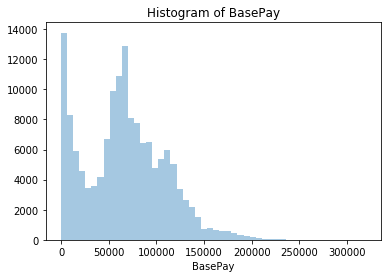

In [34]:
# plotting a histogram of the BasePay column
# .dropna() is applied to the column data to remove null values for effective analysis

sns.distplot(employee_salary["BasePay"],kde=False).set_title("Histogram of BasePay")
plt.show()

### Deductions from BasePay Histogram

- The range of values of the BasePay column is from 0 to almost 250000
- The distribution is bimodal in shape at the minimum value area meaning people who got very low salaries are the highest in number and also around the middle value area.
- The shape of the distribution appears to be a bit uniform and a little right skewed therefore the mean of the values will be a little greater than its median but not that much.
- Most of the data appears to be around 5000 to 125000.
- Most high values are to the right of the distribution meaning people who got high salaries are the least in the distribution.

We shall make a boxplot to gain more insights from this ditribution

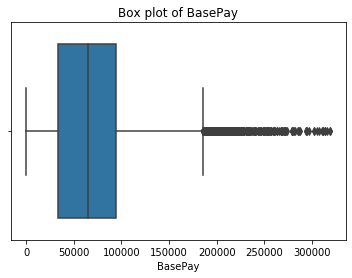

In [35]:
# plotting a boxplot of the BasePay column
sns.boxplot(employee_salary['BasePay']).set_title('Box plot of BasePay')
plt.show()

### Deductions from BasePay Boxplot

With the boxplot we are able to see clearly where our distribution truly lies 
- We were close with our estimation about where the data lies mostly
- 25 percent of our data lies around 3000 and 75 percent around 100000 leading to an interquartile range of 97000
- Most of our data lies around that range
- we can also see that our distribution appears to be uniform a bit therefore the meadian and mean would be similar and we can see this from the numerical summary above.
- We also observe that there are a lot of outliers to the right of the distribution.

## 6.2 Histogram and Boxplot of OvertimePay column

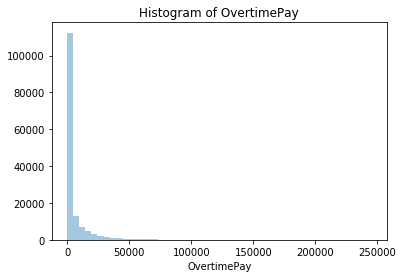

In [22]:
# plotting a histogram for the OvertimePay column
sns.distplot(employee_salary['OvertimePay'].dropna(),kde=False).set_title("Histogram of OvertimePay")
plt.show()

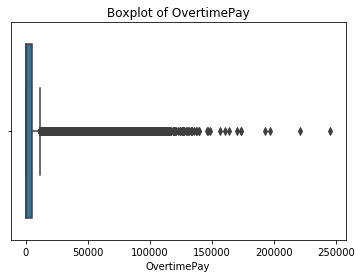

<Figure size 360000x360000 with 0 Axes>

In [23]:
# plotting a boxplot for the OvertimePay column
sns.boxplot(employee_salary['OvertimePay'].dropna()).set_title("Boxplot of OvertimePay")
plt.figure(figsize= (5000,5000))
plt.show()

### Deductions from the histogram and boxplot 

- From the histogram we see that the distribution is right skewed.
- The distribution is unimpdal with most values are at the minimum value and the highest values are the least.
- We can also see that the mean of the distribution tends to be greater than its median due to its skewness.
- As with the histogram ,the boxplot also shows that most values are around the minimum value
- Also we can see there are outliers to the right of the distribution
- Values range from 0 to about 150,000

Generally we can see that employees receive low overtime pays

## Histogram and boxplot of OtherPay

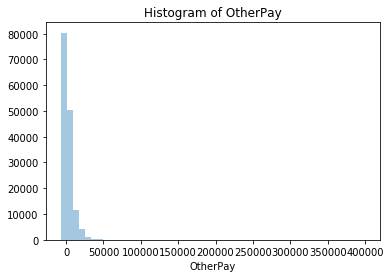

In [24]:
# plotting a histogram for the OtherPay column
sns.distplot(employee_salary['OtherPay'],kde=False).set_title("Histogram of OtherPay")
plt.show()

## Histogram of the TotalPay Column.

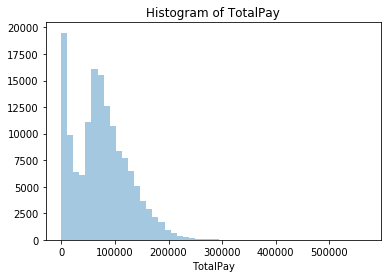

In [25]:
# plotting a histogram of the TotalPay column
sns.distplot(employee_salary["TotalPay"],kde=False).set_title("Histogram of TotalPay")
plt.show()

### Deduction from the TotalPay histogram

- From the histogram we can see that it is a unimodal distribution(one value appearing the most) which is also at the minimum value area. **Meaning people who end up with very low salaries are the highest in number.**
- The TotalPay ranges from 0 to almost 300,000.
- The shape of the distribution appears to be a bit **skewed to the right** therefore the mean would be slightly higher than the median and we see that from the statistical summary table.
- Most of our data seems to be **from 5000 to 150,000**. Most salaries would be between that range.
- Most of the high vales are to the right. **People who get very high salaries are the least in munber.**


## Histogram of TotalPayBenefits

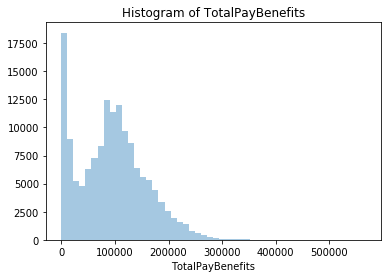

In [26]:
# plotting a histogram of the TotalPayBenefits column
sns.distplot(employee_salary["TotalPayBenefits"],kde=False).set_title("Histogram of TotalPayBenefits")
plt.show()

### Deduction from the TotalPayBenefits histogram

    - We can see that both TotalPay and TotalPayBenefits have similar graphs and shape.
    - 